# Gathering Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
from IPython.display import HTML

In [2]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
tsv_file = requests.get(url)
tsv_file

<Response [200]>

In [4]:
tsv_folder = 'images-data'
if not os.path.exists(tsv_folder):
    os.makedirs(tsv_folder)

In [5]:
file_name = url.split('/')[-1]
with open(file_name,mode = 'wb') as file:
    file.write(tsv_file.content)

In [6]:
image_df = pd.read_csv('image-predictions.tsv', sep ='\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df_now = pd.DataFrame(df_list)
api_df_now.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# Assessing the Data

In [8]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
api_df_now.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [11]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
api_df_now.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [14]:
twitter_df[twitter_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
image_df[image_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [16]:
api_df_now[api_df_now.tweet_id.duplicated()]

,favorite_count,retweet_count,tweet_id


In [18]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# Tidiness
1.there is 3 dataframes and we need only one data frame
2.there are 4 columns for doggo, floffer, pupper, and puppo in the "twitter_df" but it should be in 1 column
3.

# Quality
1.columns name are not clear
2.twitter_df" has 2356 rows while the "image_df" has only 2075 rows
3.we don't need retweets or replies in twitter_df 
4.twitter id is a float not a string,time is string!
5.In some rows the rating_denominator is more than 10 or equal zero 
6.In some rows the rating_numerator is VERY high
7.Some names of dogs are wrong

In [20]:
#Creating data copy and then cleaning our data
api_new_df = api_df_now.copy()
twitter_new_df = twitter_df.copy()
image_new_df = image_df.copy()

In [21]:
twitter_new_df.to_csv('twitter_clean.csv',encoding='utf-8',index=False)
image_new_df.to_csv('image_clean.csv',encoding='utf-8',index=False)
api_new_df.to_csv('json_clean.csv',encoding='utf-8',index=False)

In [22]:
twitter_new_df = pd.read_csv('twitter_clean.csv')
image_new_df = pd.read_csv('image_clean.csv')
api_new_df = pd.read_csv('json_clean.csv')

In [29]:
merged1_df = pd.merge(twitter_new_df, image_new_df,on=['tweet_id','tweet_id'],how='left')

In [30]:
merged1_df.to_csv('merged1.csv',encoding='utf-8',index=False)

In [31]:
df = pd.read_csv('merged1.csv')

In [32]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [34]:
df = df[df.retweeted_status_id.isnull()]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       1994 non

In [36]:
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [37]:
df = df[df.in_reply_to_status_id.isnull()]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
jpg_url                  1971 non-null object
img_num                  1971 non-null float64
p1                       1971 non-null object
p1_conf                  1971 non-null float64
p1_dog                   1971 non-null object
p2                      

In [39]:
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [40]:
df = df[df.jpg_url.notnull()]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

In [43]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [44]:
df1 = pd.melt(df, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [45]:
df[df.tweet_id.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [46]:
df1 = df1.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [47]:
df1.dog_type.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [51]:
dog_df = df.drop(['timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], axis=1)

In [52]:
dog_df = dog_df[dog_df.doggo != 'None']
dog_df

,tweet_id,doggo,floofer,pupper,puppo
9,890240255349198849,doggo,None,None,None
43,884162670584377345,doggo,None,None,None
99,872967104147763200,doggo,None,None,None
108,871515927908634625,doggo,None,None,None
121,869596645499047938,doggo,None,None,None
172,858843525470990336,doggo,None,None,None
191,855851453814013952,doggo,None,None,puppo
200,854010172552949760,doggo,floofer,None,None
240,846514051647705089,doggo,None,None,None
248,845397057150107648,doggo,None,None,None


In [53]:
pd.set_option("display.max_rows",75)

In [54]:
dog_df = dog_df[dog_df.doggo != 'None']
dog_df

,tweet_id,doggo,floofer,pupper,puppo
9,890240255349198849,doggo,None,None,None
43,884162670584377345,doggo,None,None,None
99,872967104147763200,doggo,None,None,None
108,871515927908634625,doggo,None,None,None
121,869596645499047938,doggo,None,None,None
172,858843525470990336,doggo,None,None,None
191,855851453814013952,doggo,None,None,puppo
200,854010172552949760,doggo,floofer,None,None
240,846514051647705089,doggo,None,None,None
248,845397057150107648,doggo,None,None,None


In [55]:
df1.loc[df1.tweet_id == 817777686764523521, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 808106460588765185, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 801115127852503040, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 785639753186217984, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 759793422261743616, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 751583847268179968, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 741067306818797568, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 733109485275860992, 'dog_type'] = 'None'

In [56]:
df1 = df1.drop('types',axis=1)

In [57]:
df1.dog_type.value_counts()

None       1673
pupper      201
doggo        66
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [58]:
breed = []
confidence_level = []
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence_level.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence_level.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence_level.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence_level.append(0)
df1.apply(breed_confidence, axis=1)

1895    None
1894    None
1893    None
1892    None
1891    None
1890    None
1889    None
1888    None
1887    None
1886    None
1885    None
1884    None
1896    None
1883    None
1881    None
1880    None
1879    None
1878    None
1877    None
1876    None
1875    None
1874    None
1873    None
1872    None
1871    None
1870    None
1882    None
1897    None
1898    None
1899    None
1926    None
1925    None
1924    None
1923    None
1922    None
1921    None
1920    None
        ... 
5095    None
4022    None
5511    None
5097    None
5100    None
5109    None
5022    None
4682    None
5503    None
4590    None
5104    None
5497    None
4018    None
5504    None
5975    None
5991    None
6375    None
6329    None
6607    None
6689    None
6322    None
6207    None
6209    None
6678    None
6219    None
5925    None
5927    None
6018    None
6236    None
6720    None
6059    None
6408    None
6046    None
6390    None
6588    None
6443    None
6618    None
Length: 1971, dtype: obje

In [59]:
df1['breed'] = breed
df1['confidence_level'] = confidence_level

In [60]:
df1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence_level
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,NaN,NaN,...,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,NaN,NaN,...,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None,Rottweiler,0.999091
1893,667437278097252352,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,NaN,NaN,...,False,bath_towel,0.006300,False,badger,0.000966,False,None,Unknown,0.000000
1892,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,NaN,NaN,...,False,drake,0.006918,False,hen,0.005255,False,None,Unknown,0.000000
1891,667453023279554560,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,NaN,NaN,...,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,None,Labrador_retriever,0.825670
1890,667455448082227200,2015-11-19 21:32:34 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,NaN,NaN,...,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,None,Tibetan_terrier,0.676376
1889,667470559035432960,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,NaN,NaN,...,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,None,toy_poodle,0.304175
1888,667491009379606528,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,NaN,NaN,...,True,ice_bear,0.132264,False,weasel,0.005730,False,None,borzoi,0.852088
1887,667495797102141441,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,NaN,NaN,...,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False,None,Chihuahua,0.143957
1886,667502640335572993,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,NaN,NaN,...,True,golden_retriever,0.001688,True,beagle,0.000712,True,None,Labrador_retriever,0.996709


In [61]:
df1 = df1.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [62]:
list(df1['name'])

['Biden',
 'None',
 'None',
 'None',
 'Cupcake',
 'Reese',
 'a',
 'None',
 'Philippe',
 'Hall',
 'None',
 'Dook',
 'Fwed',
 'None',
 'Frank',
 'a',
 'Kial',
 'George',
 'None',
 'None',
 'Olive',
 'Calvin',
 'a',
 'None',
 'None',
 'None',
 'Naphaniel',
 'None',
 'Genevieve',
 'Joshwa',
 'a',
 'None',
 'Jockson',
 'Jeph',
 'None',
 'None',
 'None',
 'a',
 'Carll',
 'Klevin',
 'None',
 'Keet',
 'None',
 'Dave',
 'Clybe',
 'Gabe',
 'None',
 'Pipsy',
 'Bradlay',
 'Churlie',
 'Kenneth',
 'Clarence',
 'None',
 'a',
 'Timison',
 'None',
 'None',
 'Filup',
 'None',
 'a',
 'Shaggy',
 'Josep',
 'None',
 'Tedrick',
 'Stu',
 'Erik',
 'Cleopatricia',
 'None',
 'Otis',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'a',
 'Lugan',
 'a',
 'Christoper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'an',
 'a',
 'an',
 'None',
 'None',
 'None',
 'None',
 'None',
 'a',
 'quite',
 'Walter',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Scout',
 'Kreggory',
 'Jimothy',
 'None',
 'None

In [63]:
correct_name=[]
def incorrect_name(row):
    if row['name'][0].islower() == True:
        correct_name.append('None')
    else:
        correct_name.append(row['name'])
df1.apply(incorrect_name, axis=1)   
df1['correct_name'] = correct_name

In [64]:
df1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence_level,correct_name
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,NaN,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377,Biden
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091,None
1893,667437278097252352,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,Unknown,0.000000,None
1892,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,Unknown,0.000000,None
1891,667453023279554560,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,NaN,NaN,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador_retriever,0.825670,Cupcake
1890,667455448082227200,2015-11-19 21:32:34 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,NaN,NaN,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,None,Tibetan_terrier,0.676376,Reese
1889,667470559035432960,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,NaN,NaN,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,None,toy_poodle,0.304175,None
1888,667491009379606528,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,NaN,NaN,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,None,borzoi,0.852088,None
1887,667495797102141441,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,NaN,NaN,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,None,Chihuahua,0.143957,Philippe
1886,667502640335572993,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,NaN,NaN,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,None,Labrador_retriever,0.996709,Hall


In [65]:
df1['name'] = df1['correct_name']

In [66]:
df1 = df1.drop('correct_name', axis=1)

In [67]:
df1.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [69]:
rating_df = df1.drop(['timestamp','source','expanded_urls','name',
 'jpg_url','dog_type','breed','confidence_level'],axis=1)

In [70]:
rating_df = rating_df[rating_df.rating_denominator != 10]

In [71]:
pd.set_option("display.max_colwidth",280)

In [72]:
rating_df

,tweet_id,text,rating_numerator,rating_denominator,favorites,retweet_count
1950,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2,NaN,NaN
3284,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11,NaN,NaN
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110,NaN,NaN
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,NaN,NaN
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,NaN,NaN
2889,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,NaN,NaN
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,NaN,NaN
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40,NaN,NaN
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,NaN,NaN
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80,NaN,NaN


In [73]:
df1.loc[df1.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df1.loc[df1.tweet_id == 666287406224695296, 'rating_denominator'] = 10
df1.loc[df1.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 682962037429899265, 'rating_denominator'] = 10
df1.loc[df1.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df1.loc[df1.tweet_id == 716439118184652801, 'rating_denominator'] = 10
df1.loc[df1.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 810984652412424192, 'rating_denominator'] = 10
df1.loc[df1.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df1.loc[df1.tweet_id == 740373189193256964, 'rating_denominator'] = 10
df1.loc[df1.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df1.loc[df1.tweet_id == 722974582966214656, 'rating_denominator'] = 10

In [74]:
df1.rating_numerator.value_counts()

12      446
10      419
11      393
13      254
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
1776      1
26        1
420       1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [76]:
rating2_df = df1.drop(['timestamp','source','expanded_urls','name',
 'jpg_url','dog_type','breed','confidence_level'],axis=1)

In [77]:
rating2_df = rating2_df[rating2_df.rating_numerator > 14]

In [82]:
rating2_df

,tweet_id,text,rating_numerator,rating_denominator,favorites,retweet_count
3330,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,NaN,NaN
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110,NaN,NaN
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,NaN,NaN
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,NaN,NaN
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,NaN,NaN
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40,NaN,NaN
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,NaN,NaN
3667,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10,NaN,NaN
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80,NaN,NaN
3391,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120,NaN,NaN


In [79]:
df1.loc[df1.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
df1.loc[df1.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
df1.loc[df1.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27

In [80]:
df1['source'] = df1['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [81]:
df1['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [83]:
df1.timestamp = df1.timestamp.str.strip('+0000')

In [84]:
df1.timestamp = pd.to_datetime(df1.timestamp)

In [86]:
df1['tweet_id'] = df1['tweet_id'].astype(object)
df1['source'] = df1['source'].astype('category')
df1['dog_type'] = df1['dog_type'].astype('category')
df1['confidence_level'] = df1['confidence_level'].round(2)

In [87]:
df1 = df1.rename(columns = {'timestamp':'date_of_the_tweet', 'source': 'tweet_source','text': 'tweet_text','expanded_urls': 'tweet_url',
 'rating_numerator': 'dog_score', 'rating_denominator':'out_of','name': 'dog_name',
   'jpg_url': 'image_link', 'breed': 'dog_breed',})

In [88]:
df1.to_csv('twitter_master.csv', encoding='utf-8',index=False)

In [89]:
df_clean = pd.read_csv('twitter_master.csv')

# Analyzing the Data

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
%matplotlib inline

In [92]:
sns.set(style="darkgrid",font_scale=2)

In [93]:
df_clean.describe()

,tweet_id,dog_score,out_of,favorites,retweet_count,confidence_level
count,1.971000e+03,1971.000000,1971.000000,0.0,0.0,1971.000000
mean,7.360418e+17,12.160467,10.456621,NaN,NaN,0.466301
std,6.752810e+16,41.596706,6.788653,NaN,NaN,0.339697
min,6.660209e+17,0.000000,10.000000,NaN,NaN,0.000000
25%,6.758656e+17,10.000000,10.000000,NaN,NaN,0.140000
50%,7.088343e+17,11.000000,10.000000,NaN,NaN,0.460000
75%,7.880951e+17,12.000000,10.000000,NaN,NaN,0.780000
max,8.924206e+17,1776.000000,170.000000,NaN,NaN,1.000000


In [94]:
df_clean

,tweet_id,date_of_the_tweet,tweet_source,tweet_text,tweet_url,dog_score,out_of,dog_name,favorites,retweet_count,image_link,dog_type,dog_breed,confidence_level
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7.0,10,Biden,NaN,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.38
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12.0,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,1.00
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10.0,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,Unknown,0.00
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6.0,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,Unknown,0.00
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11.0,10,Cupcake,NaN,NaN,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador_retriever,0.83
5,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7.0,10,Reese,NaN,NaN,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,None,Tibetan_terrier,0.68
6,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,None,NaN,NaN,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,None,toy_poodle,0.30
7,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,NaN,NaN,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,None,borzoi,0.85
8,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,NaN,NaN,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,None,Chihuahua,0.14
9,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,NaN,NaN,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,None,Labrador_retriever,1.00


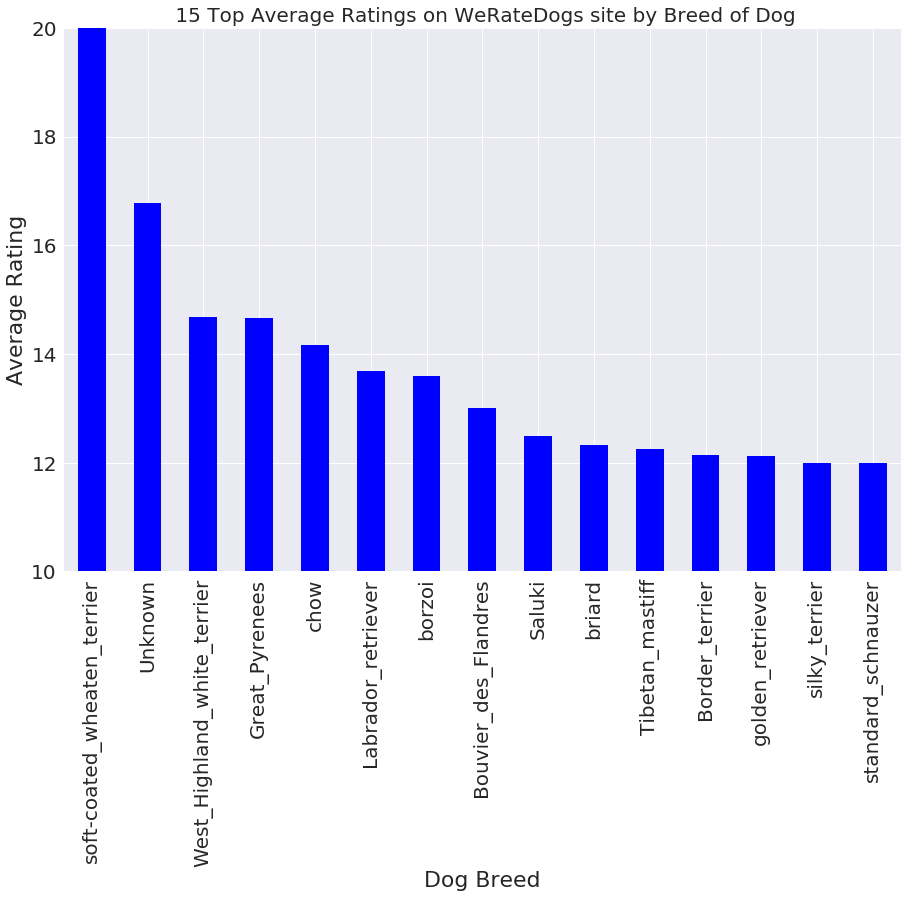

In [101]:
fig1 = plt.figure(figsize=(15,10))
df_clean.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(15).plot(kind='bar',color='blue')
plt.title(" 15 Top Average Ratings on WeRateDogs site by Breed of Dog",fontsize=20)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,20);

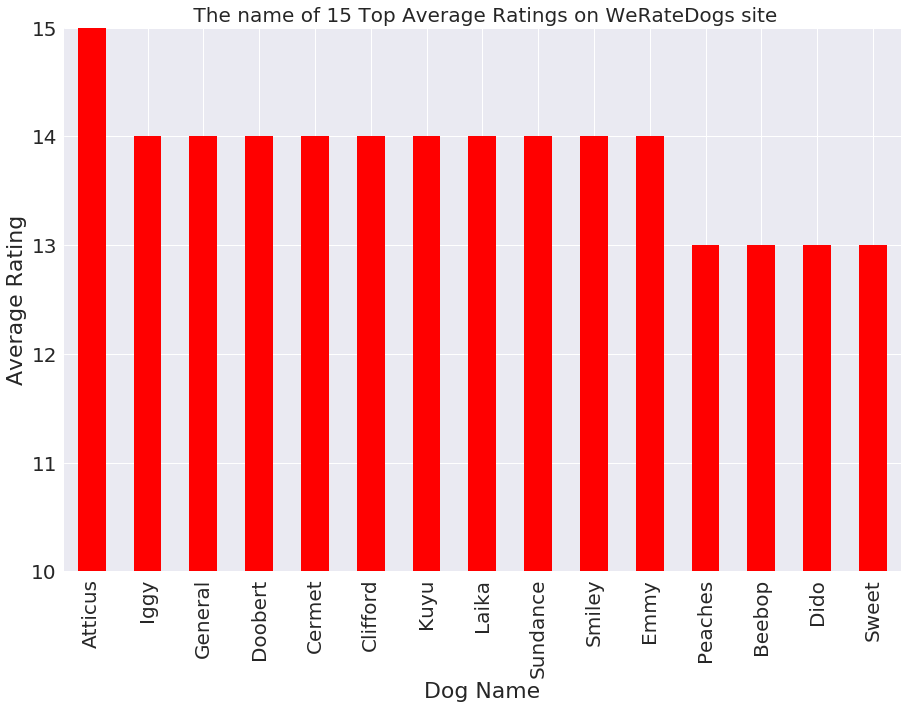

In [102]:
fig = plt.figure(figsize=(15,10))
df_clean.groupby('dog_name')['dog_score'].mean().sort_values(ascending=False).nlargest(15).plot(kind='bar',color='red')
plt.title(" The name of 15 Top Average Ratings on WeRateDogs site",fontsize=20)
plt.ylabel("Average Rating")
plt.xlabel("Dog Name")
plt.ylim(10,15);

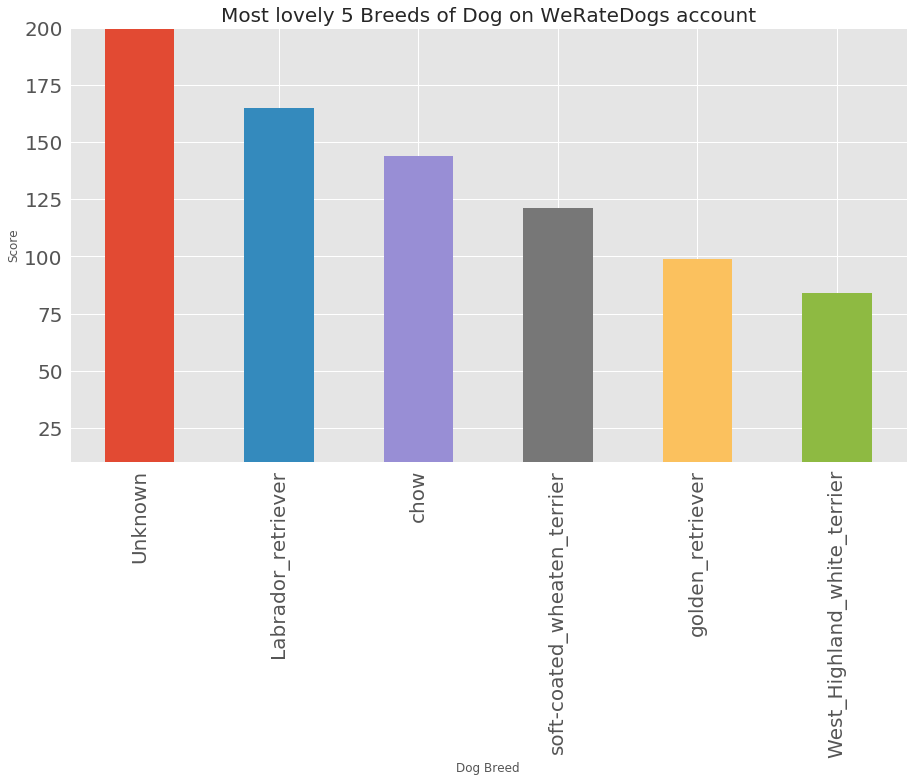

In [124]:
fig = plt.figure(figsize=(15,8))
df_clean.groupby('dog_breed')['dog_score'].max().sort_values(ascending=False).nlargest(6).plot(kind='bar')
plt.title("Most lovely 5 Breeds of Dog on WeRateDogs account",fontsize=20)
plt.ylabel("Score")
plt.xlabel("Dog Breed");
plt.ylim(10,200);

In [107]:
df_clean.dog_breed.value_counts().nlargest(10)

Unknown               305
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
Name: dog_breed, dtype: int64

In [112]:
df_clean.groupby('date_of_the_tweet')['dog_score'].mean().sort_values(ascending=False).nlargest(20)

date_of_the_tweet
2016-07-04 15:00:45    1776.0
2015-11-29 05:52:33     420.0
2016-05-13 16:15:54     204.0
2016-07-28 01:00:57     165.0
2015-12-18 05:06:23     144.0
2016-01-05 04:00:18     121.0
2016-03-27 01:29:02      99.0
2015-12-13 01:41:41      88.0
2017-01-15 17:52:40      84.0
2016-03-18 02:46:49      80.0
2016-02-28 21:25:30      60.0
2016-03-14 02:04:08      45.0
2016-02-10 16:51:59      44.0
2017-05-17 16:00:15      14.0
2017-02-05 23:15:47      14.0
2017-01-11 02:21:57      14.0
2017-02-06 17:02:17      14.0
2017-01-14 17:00:24      14.0
2017-01-11 02:15:36      14.0
2017-07-10 15:58:53      14.0
Name: dog_score, dtype: float64

In [111]:
df_clean.dog.value_counts()

2015-12-17 03:48:51    1
2015-11-16 00:49:46    1
2017-01-13 01:03:12    1
2017-06-02 15:00:16    1
2015-11-19 04:39:35    1
2016-11-06 22:59:35    1
2016-07-18 01:53:28    1
2015-11-18 03:54:28    1
2016-10-20 01:03:11    1
2016-06-13 01:06:33    1
2016-03-06 16:27:23    1
2016-01-16 04:11:31    1
2016-09-25 23:47:39    1
2016-09-21 01:39:11    1
2016-03-25 17:03:49    1
2015-11-18 00:36:17    1
2015-12-07 03:51:47    1
2015-11-25 04:43:02    1
2017-02-20 17:00:04    1
2017-01-10 01:15:10    1
2015-11-26 05:42:55    1
2017-04-07 00:38:06    1
2016-09-03 16:52:02    1
2017-03-03 01:14:41    1
2015-11-19 20:44:47    1
2016-05-05 00:16:48    1
2015-12-04 02:51:33    1
2016-02-01 15:39:48    1
2016-09-21 17:42:10    1
2015-12-27 22:37:04    1
2017-07-09 00:00:04    1
2016-11-04 00:15:59    1
2015-12-14 03:08:46    1
2015-11-16 16:37:02    1
2015-11-19 21:22:56    1
2017-01-11 17:01:16    1
2015-12-10 02:15:47    1
                      ..
2016-01-07 00:59:40    1
2015-11-23 20:42:48    1


In [114]:
df_clean.groupby('dog_type')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
None,1673.0,12.357448,45.142907,0.0,10.0,11.0,12.0,1776.0
doggo,66.0,11.878788,1.462507,8.0,11.0,12.0,13.0,14.0
floofer,8.0,11.875000,1.125992,10.0,11.0,12.0,13.0,13.0
pupper,201.0,10.638159,1.736025,3.0,10.0,11.0,12.0,14.0
puppo,23.0,12.043478,1.296087,9.0,11.5,12.0,13.0,14.0


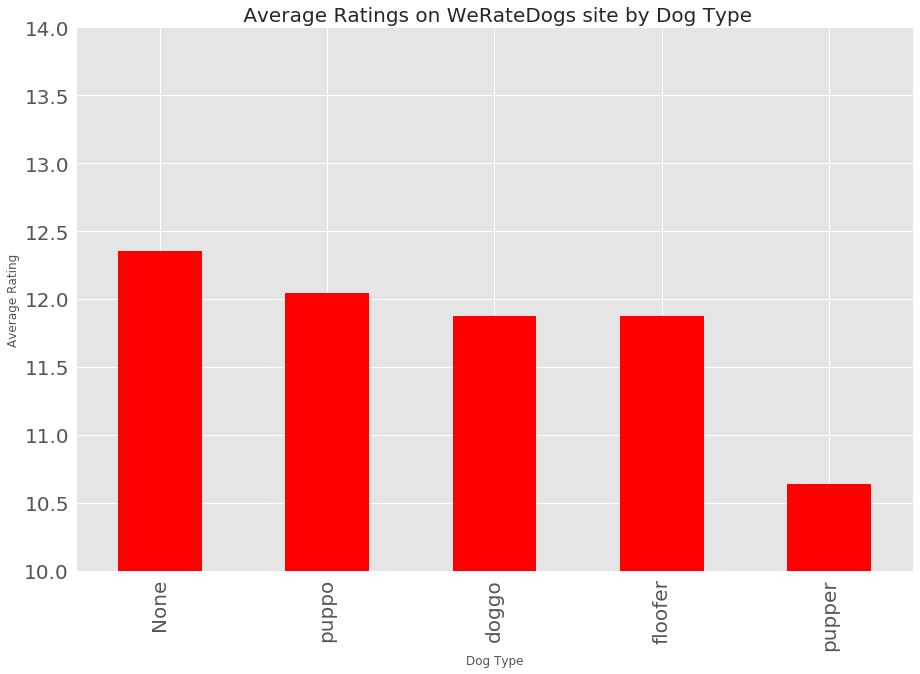

In [119]:
fig = plt.figure(figsize=(15,10))
df_clean.groupby('dog_type')['dog_score'].mean().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title(" Average Ratings on WeRateDogs site by Dog Type",fontsize=20)
plt.ylabel("Average Rating")
plt.xlabel("Dog Type")
plt.ylim(10,14);

In [125]:
df_clean.groupby('dog_type')['tweet_source'].describe()

,count,unique,top,freq
dog_type,,,,
None,1673,3,Twitter for iPhone,1637
doggo,66,2,Twitter for iPhone,65
floofer,8,1,Twitter for iPhone,8
pupper,201,3,Twitter for iPhone,199
puppo,23,1,Twitter for iPhone,23


In [126]:
df_clean.tweet_source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: tweet_source, dtype: int64